<a href="https://colab.research.google.com/github/akumarpandey686/DataPreprocessing_Code/blob/master/Transfer_learning_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/data1_300/train'
valid_path = '/content/drive/My Drive/data1_300/test'

In [ ]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/data1_300/train/*')
folders

['/content/drive/My Drive/data1_300/train/np',
 '/content/drive/My Drive/data1_300/train/p']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

In [ ]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data1_300/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 173 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data1_300/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 18 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
6/6 [==============================] - 2s 402ms/step - loss: 0.3367 - accuracy: 0.8613 - val_loss: 0.7382 - val_accuracy: 0.7778
Epoch 2/5
6/6 [==============================] - 2s 374ms/step - loss: 0.3177 - accuracy: 0.8555 - val_loss: 0.6009 - val_accuracy: 0.7778
Epoch 3/5
6/6 [==============================] - 2s 385ms/step - loss: 0.3254 - accuracy: 0.8613 - val_loss: 0.7767 - val_accuracy: 0.7222
Epoch 4/5
6/6 [==============================] - 2s 384ms/step - loss: 0.4214 - accuracy: 0.8324 - val_loss: 0.7649 - val_accuracy: 0.7778
Epoch 5/5
6/6 [==============================] - 2s 384ms/step - loss: 0.5061 - accuracy: 0.8324 - val_loss: 0.5620 - val_accuracy: 0.7778


In [ ]:
model.save('res.h5')

In [ ]:
from keras.models import load_model
n_model = load_model('res.h5')

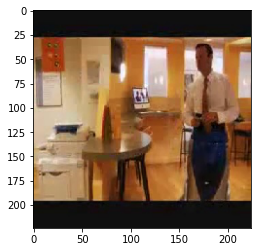

In [ ]:
img = image.load_img('/content/drive/My Drive/data1_300/nP_2260.jpg',target_size=(224,224,3))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)

In [ ]:
output = n_model.predict(img)
if output[0][0] == 0:
  print('p')
else:
  print('np')

np
